In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt
from scipy.stats import norm
from matplotlib import pyplot
from __future__ import print_function, division
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis

In [4]:
#Dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#dataframe description
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
#check the shape of data
data.shape

(1338, 7)

In [7]:
#check for columns"
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#check for number of unique values per 
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
# checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Check all unique values
L =[]
for c in data.columns:
    L.append(c)

for l in L:
    print(l,":/n")
    print(data[l].unique())

age :/n
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex :/n
['female' 'male']
bmi :/n
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4

<AxesSubplot:>

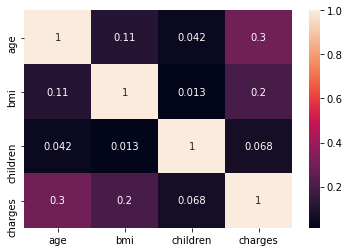

In [11]:
# Relationship between variables
corr = data.corr()
sn.heatmap( corr, xticklabels = corr.columns,  yticklabels = corr.columns,
          annot = True)

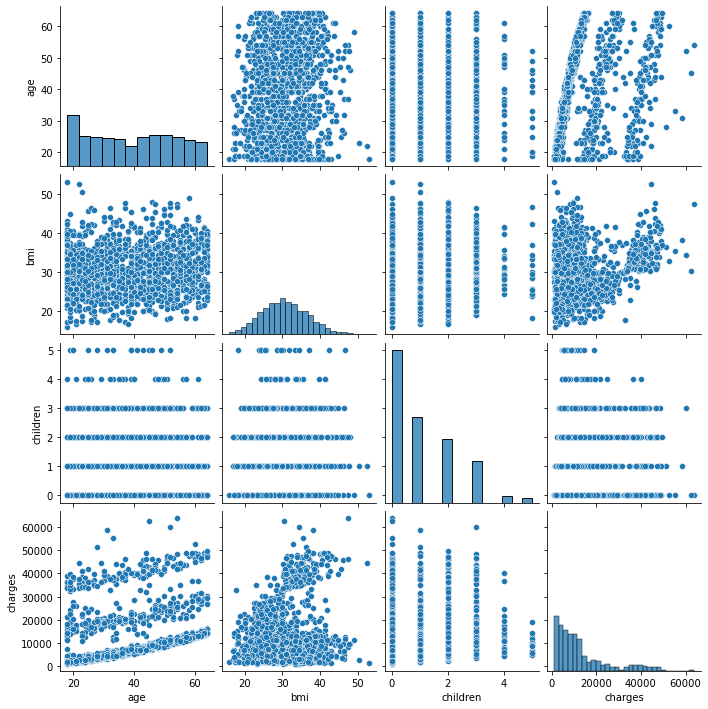

In [12]:
sn.pairplot(data)

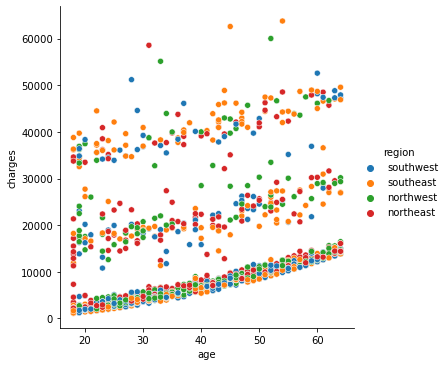

In [13]:
sn.relplot(x='age', y ='charges', hue ='region', data=data)

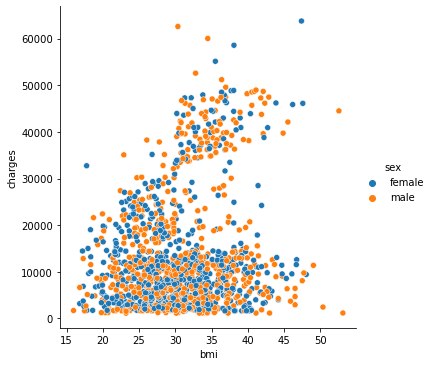

In [14]:
sn.relplot(x='bmi', y ='charges', hue ='sex', data=data)

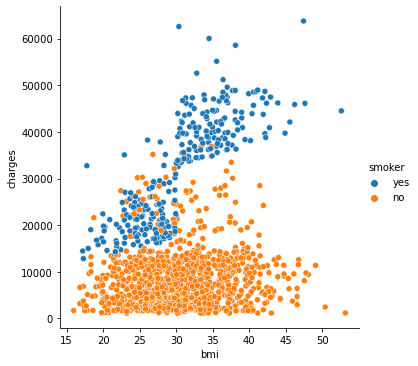

In [15]:
sn.relplot(x='bmi', y ='charges', hue ='smoker', data=data)

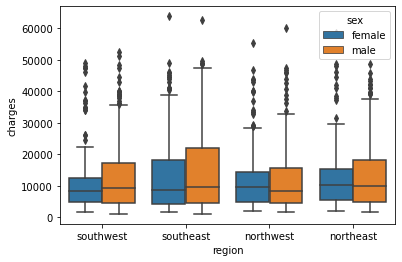

In [16]:
sn.boxplot(x= data.region, y=data.charges, hue=data.sex );
plt.show()

In [17]:
p=data.groupby(['sex','region'])[['charges']].mean()
p

charges
sex    region                 
female northeast  12953.203151
       northwest  12479.870397
       southeast  13499.669243
       southwest  11274.411264
male   northeast  13854.005374
       northwest  12354.119575
       southeast  15879.617173
       southwest  13412.883576

In [18]:
p=data.groupby(['sex',])[['charges']].mean()
p

,charges
sex,
female,12569.578844
male,13956.751178


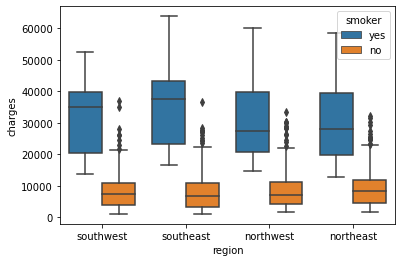

In [19]:
sn.boxplot(x= data.region, y=data.charges, hue=data.smoker );
plt.show()

In [20]:
d=data.groupby(['sex','smoker'])[['charges']].min()
d

charges
sex    smoker            
female no       1607.5101
       yes     13844.5060
male   no       1121.8739
       yes     12829.4551

In [21]:
p=data.groupby(['sex','region'])[['charges']].max()
p

charges
sex    region                
female northeast  58571.07448
       northwest  55135.40209
       southeast  63770.42801
       southwest  48824.45000
male   northeast  48549.17835
       northwest  60021.39897
       southeast  62592.87309
       southwest  52590.82939

In [22]:
p=data.groupby(['sex','smoker'])[['charges']].count()
p

charges
sex    smoker         
female no          547
       yes         115
male   no          517
       yes         159

In [23]:
p=data.groupby(['sex','smoker'])[['charges']].mean()
p

charges
sex    smoker              
female no       8762.297300
       yes     30678.996276
male   no       8087.204731
       yes     33042.005975

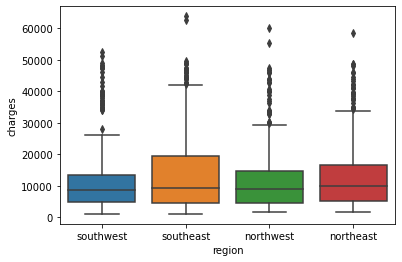

In [24]:
sn.boxplot(x= data.region, y=data.charges);
plt.show()

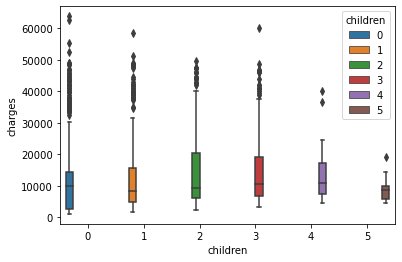

In [25]:
sn.boxplot(x= data.children, y=data.charges, hue=data.children );
plt.show()

C:\Users\ESSOH GO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)

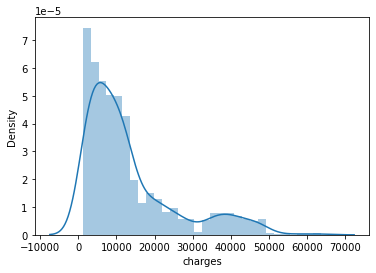

In [26]:
#check  charges distribution
sn.distplot(data.charges)
scipy.stats.shapiro(data.charges)

## Data transformation

In [27]:
# create dummies variables for categorical variables 
data.head()
dummies1 = pd.get_dummies(data.sex)
dummies2 = pd.get_dummies(data.smoker)
dummies3 = pd.get_dummies(data.region)

In [28]:
#merge dummies dataframes
data1 = data.merge(dummies1, left_index=True, right_index=True)
data2 = data1.merge(dummies2, left_index=True, right_index=True)
data3 = data2.merge(dummies3, left_index=True, right_index=True)

In [29]:
#drop columns
data_df = data3.drop(columns=['sex', 'smoker','region'])
data_df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [30]:
# remane columns
data_df.rename(columns= {'no':'nonsmoker', 'yes':'smoker'}, inplace= True)
data_df

,age,bmi,children,charges,female,male,nonsmoker,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [31]:
#new dataframe info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   female     1338 non-null   uint8  
 5   male       1338 non-null   uint8  
 6   nonsmoker  1338 non-null   uint8  
 7   smoker     1338 non-null   uint8  
 8   northeast  1338 non-null   uint8  
 9   northwest  1338 non-null   uint8  
 10  southeast  1338 non-null   uint8  
 11  southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [32]:
#Splitting features and target data
X = data_df.drop(columns='charges')
y = data_df.charges

## Validation process

In [33]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:5588.4
R_squared: 0.79


## Feature Selection

In [34]:
#Let's try to filter by variance
data_df.var()

age          1.974014e+02
bmi          3.718788e+01
children     1.453213e+00
charges      1.466524e+08
female       2.501596e-01
male         2.501596e-01
nonsmoker    1.629689e-01
smoker       1.629689e-01
northeast    1.836519e-01
northwest    1.840371e-01
southeast    1.981859e-01
southwest    1.840371e-01
dtype: float64

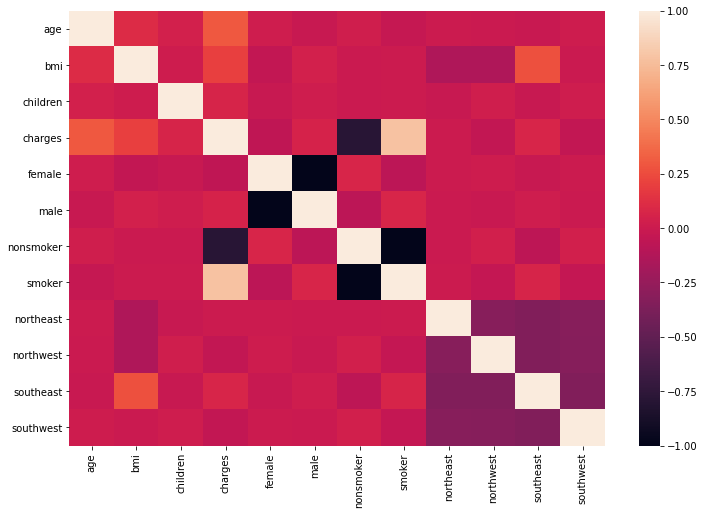

In [35]:
#Feature selection by correlation
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(data_df.corr(), ax=ax)
plt.show()

-High multicolinearity between nonsmoker and smoker features and between female and male features
-smoker and  nonsmoker feautres seem to be highly correlated to charges with being smoker driving the charges high and nonsmoker the charges low.

In [36]:
#let's get th absolute values of the correlation with charges
abs(data_df.corr()['charges'])

age          0.299008
bmi          0.198341
children     0.067998
charges      1.000000
female       0.057292
male         0.057292
nonsmoker    0.787251
smoker       0.787251
northeast    0.006349
northwest    0.039905
southeast    0.073982
southwest    0.043210
Name: charges, dtype: float64

In [37]:
vals = [0.01,0.05,0.1,0.2,0.3]
for val in vals:
    features = abs(data_df.corr()['charges'][abs(data_df.corr()['charges'])>val].drop('charges')).index.tolist()
    
    #X = data_df.drop(columns='charges')
    X=X[features]
    
    print(features)
    
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))

['age', 'bmi', 'children', 'female', 'male', 'nonsmoker', 'smoker', 'northwest', 'southeast', 'southwest']
RMSE:5545.89
R_squared: 0.79
['age', 'bmi', 'children', 'female', 'male', 'nonsmoker', 'smoker', 'southeast']
RMSE:5167.48
R_squared: 0.82
['age', 'bmi', 'nonsmoker', 'smoker']
RMSE:4835.55
R_squared: 0.84
['age', 'nonsmoker', 'smoker']
RMSE:6698.26
R_squared: 0.69
['nonsmoker', 'smoker']
RMSE:7707.79
R_squared: 0.59


From the above the list the best values of RMSE and R_squared will determine the features we retain. age, bmi, nonsmoker and smoker are the features retained. But multicolinearity has to be taken into account.

In [38]:
data_df['smoker*nonsmoker'] = data_df['smoker']*data_df['nonsmoker']
data_df.head()

,age,bmi,children,charges,female,male,nonsmoker,smoker,northeast,northwest,southeast,southwest,smoker*nonsmoker
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0


In [39]:
X1 = data_df.drop(columns='charges')[['age','bmi','smoker*nonsmoker']]
y = data_df['charges']
y_pred = cross_val_predict(classifier_pipeline, X1, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE:11935.97
R_squared: 0.028


Combining smoker and nonsmoker does not imrpve RMSE and R_squared.

In [40]:
#Feature Selection Using a Wrapper

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [42]:
sfs1 = SFS(classifier_pipeline, 
           k_features=1, 
           forward=False,
          scoring='neg_mean_squared_error',
          cv=cv)

X = data_df.drop(columns=['charges', 'smoker*nonsmoker'])

sfs1.fit(X,y)

sfs1.subsets_

{11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([-28499600.22618688, -25718267.93689313, -27845297.91244553,
         -21604252.93460891, -30420778.44333691, -29436595.24813187,
         -30562245.07660336, -28859276.4064737 , -34196164.70674427,
         -55363507.03315268]),
  'avg_score': -31250598.592457723,
  'feature_names': ('age',
   'bmi',
   'children',
   'female',
   'male',
   'nonsmoker',
   'smoker',
   'northeast',
   'northwest',
   'southeast',
   'southwest')},
 10: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([-26590621.69644393, -24492059.62707515, -24936887.42068136,
         -20897172.45382872, -31340222.00476001, -27520175.02022622,
         -25522377.11230047, -24978657.48996331, -30753613.38553109,
         -48124080.46025854]),
  'avg_score': -28515586.667106878,
  'feature_names': ('age',
   'bmi',
   'female',
   'male',
   'nonsmoker',
   'smoker',
   'northeast',
   'northwest',
   'southeast',
   'so

The features with the lowest average score are age, bmi, smoker and northeast

In [43]:
X1 = data_df.drop(columns='charges')[['age','bmi','smoker','northeast']]
y = data_df['charges']
y_pred = cross_val_predict(classifier_pipeline, X1, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y,y_pred),3)))

RMSE:4869.828
R_squared: 0.838


 At the end of the feature selection process, these features are retained for modelisation: age, bmi, smoker and nonsmoker.

## Models

In [44]:
#Linear regression
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(),  LinearRegression())

X = data_df.drop(columns='charges')[['age','bmi','smoker','nonsmoker']]

y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:6121.29
R_squared: 0.74


In [45]:
# Kneighbors Regressor
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=12))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:4809.72
R_squared: 0.84


In [46]:
error = []
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    error.append(sqrt(mean_squared_error(y,y_pred)))

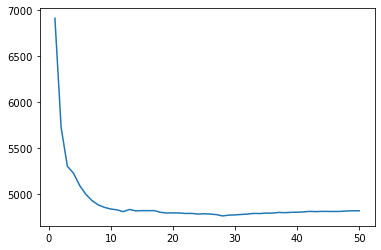

In [47]:
plt.plot(range(1,51), error)

The curve confirms that the value of k which minimizes the error is 12.

In [48]:
# XGboost regressor
from xgboost import XGBRegressor

In [49]:
classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =100, 
                                                  max_depth = 3, 
                                                  seed = 0))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:4621.67
R_squared: 0.85


In [50]:
#XGboost tuning
from sklearn.model_selection import RandomizedSearchCV
vals = [10,50,100,150,200, 250, 300, 350, 400]
for val in vals:
    classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =val, 
                                                  max_depth = 3, 
                                                  seed = 0))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:7683.08
R_squared: 0.6
RMSE:4559.78
R_squared: 0.86
RMSE:4621.67
R_squared: 0.85
RMSE:4687.98
R_squared: 0.85
RMSE:4742.31
R_squared: 0.85
RMSE:4773.08
R_squared: 0.84
RMSE:4808.46
R_squared: 0.84
RMSE:4845.08
R_squared: 0.84
RMSE:4880.64
R_squared: 0.84


In [51]:
#range 1 to 50
error1 =[]
for k in range(1,51):
    classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =k, 
                                                  max_depth = 3, 
                                                  seed = 0))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    error1.append(sqrt(mean_squared_error(y,y_pred)))

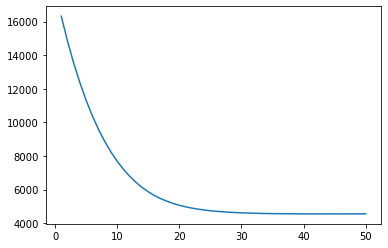

In [52]:
plt.plot(range(1,51), error1)

In [53]:
#Let's focus on range 40 to 51
error2 =[]
for k in range(40,51):
    classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =k, 
                                                  max_depth = 3, 
                                                  seed = 0))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
    error2.append(sqrt(mean_squared_error(y,y_pred)))

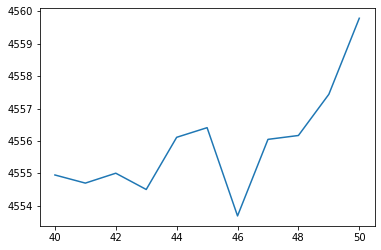

In [54]:
plt.plot(range(40,51), error2)

In [55]:
 classifier_pipeline = make_pipeline(StandardScaler(), XGBRegressor(objective= 'reg:squarederror',
                                                  learning_rate = 0.1,
                                                  n_estimators =46, 
                                                  max_depth = 3, 
                                                  seed = 0))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE:" + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE:4553.69
R_squared: 0.86


The curve confirms that the value of n_estimators which minimizes the error is 46.